# Viscoelastic fluid in a pipe (Maxwell model)

We are going to consider the problem of transient flow of viscoelastic flow in a pipe.

The transient equation for laminar flow, with velocity only in radial equation is

$$ \rho \frac{\partial u}{\partial t} = P + \frac{1}{r}\frac{\partial r\tau}{\partial r} $$

where we denote $P = -\frac{\partial p}{\partial z}$, where $z$ is the axis of the pipe. 

For a **Newtonian flow**, stress tensor is computed with

$$ \tau = \eta \frac{\partial u}{\partial r}$$

and the solution is the well known [Hagen-Poiseuille flow](https://en.wikipedia.org/wiki/Hagen%E2%80%93Poiseuille_equation). However, if a **viscoelastic fluid** is considered, the stress is computed with

$$ \tau + \lambda \frac{\partial \tau}{\partial t} = \eta \frac{\partial u}{\partial r} $$

where $\lambda$ is the relaxation time.

We can write this equations with dimensionless variables, by defining

\begin{eqnarray}
r^* &=& \frac{r}{R} \\
t^* &=& \frac{\eta}{\rho R^2}t \\
u^* &=& \frac{4\eta}{R^2P}u \\
\tau^* &=& \frac{4}{RP}\tau \\
\xi &=& \frac{\eta}{\rho R^2}\lambda
\end{eqnarray}

With these variables, the dimensionless equations are (we drop the "*" for the sake of simplicity):

\begin{eqnarray}
\frac{\partial u}{\partial t} &=& 4 + \frac{\partial \tau}{\partial r} + \frac{\tau}{r} \\
\tau + \xi\frac{\partial \tau}{\partial t} &=& \frac{\partial u}{\partial r}
\end{eqnarray}

The boundary conditions are:

$$ u(r=1) = 0 \;\forall t $$
$$ \left(\frac{\partial u}{\partial r}\right)_{r=0} = 0\;\forall t$$

and the initial conditions are 

$$ u(r) = \tau(r) = 0 \;\text{for}\,t=0$$

This is a system of PDE that cannot be solved analytically (at least, not easily).

The more easier method is to use the [Finite Difference Method](https://en.wikipedia.org/wiki/Finite_difference_method) (FD) Method

Translating the previous equations to FD language, with explicit scheme, with central difference in space and forward in time, we get

\begin{eqnarray}
\frac{u_i^{n+1} - u_i^n}{\Delta t} &=& 4 + \frac{\tau_i^{n+1} - \tau_i^{n-1}}{2\Delta r} + \frac{\tau_i^n}{r_i} \\
\tau_i^n + \xi\frac{\tau_i^{n+1} - \tau_i^n}{\Delta t} &=& \frac{u_{i+1}^n-u_{i-1}^n}{2\Delta r}
\end{eqnarray}

and, in terms of previous time step,

\begin{eqnarray}
u_i^{n+1} &=& u_i^n + \Delta t\left( 4 + \frac{\tau_i^{n+1} - \tau_i^{n-1}}{2\Delta r} + \frac{\tau_i^n}{r_i} \right) \\
\tau_i^{n+1} &=& \tau_i^n + \frac{\Delta t}{\xi}\left(\frac{u_{i+1}^n-u_{i-1}^n}{2\Delta r} - \tau_i^n  \right) 
\end{eqnarray}

In [1]:
def uNew(u,tau,tauS,tauN,r):
    return (u + deltat*(4+(tauN-tauS)/(2*deltar)+tau/r))

def tauNew(tau,uS,uN):
    #return (xi/(xi+deltat)*tau+deltat/(2*deltar*(deltat+xi))*(uN-uS))
    return (tau + deltat/xi*((uN-uS)/(2*deltar)-tau))
    
def tauNewNew(uS,uN):
    return (1/(2*deltar)*(uN-uS))

In [2]:
import numpy as np

In [8]:
N = 100
T = 1 #dimensionless
K = 100
deltar = 1/N
deltat = T/K
xi = 1

In [9]:
u = np.zeros((N,K))
tau = np.zeros((N,K))

In [10]:
for k in range(1,K-1):
    for i in range(1,N-1):
        tau[i,k] = tauNew(tau[i,k-1],u[i-1,k],u[i+1,k])
    for i in range(1,N-1):
        u[i,k+1] = uNew(u[i,k],tau[i,k],tau[i-1,k],tau[i+1,k],i*deltar)
    u[0,k] = u[1,k]
    u[N-1,k] = 0

In [11]:
deltar

0.01

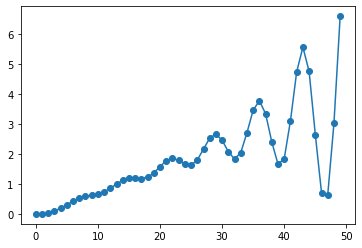

In [17]:
import matplotlib.pyplot as plt
plt.plot(u[0,:50],'o-')
#plt.plot(tau[:,0])

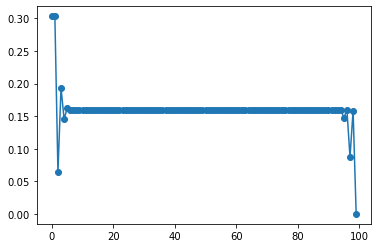

In [13]:
plt.plot(u[:,5],'o-')

In [45]:
u[3,:]

array([0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.  ])

In [80]:
tau[6,:]

array([ 0.00000000e+00,  9.38322955e-03, -3.82468596e-04,  1.91234298e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  